In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("tennis.csv")
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
outlook = LabelEncoder()
temp= LabelEncoder()
humidity = LabelEncoder()
windy = LabelEncoder()
play = LabelEncoder()

In [4]:
data["outlook"]= outlook.fit_transform(data["outlook"])
data["temp"]= temp.fit_transform(data["temp"])
data["humidity"]= humidity.fit_transform(data["humidity"])
data["windy"]= windy.fit_transform(data["windy"])
data["play"]= play.fit_transform(data["play"])

In [5]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [6]:
features_cols=['outlook','temp','humidity','windy']
X=data[features_cols]
y=data.play

In [7]:
X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [8]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [9]:
train_test_split(X, y, test_size = 0.2, random_state = 40)

[    outlook  temp  humidity  windy
 3         1     2         0      0
 12        0     1         1      0
 4         1     0         1      0
 1         2     1         0      1
 2         0     1         0      0
 9         1     2         1      0
 8         2     0         1      0
 5         1     0         1      1
 7         2     2         0      0
 11        0     2         0      1
 6         0     0         1      1,
     outlook  temp  humidity  windy
 0         2     1         0      0
 13        1     2         0      1
 10        2     2         1      1,
 3     1
 12    1
 4     1
 1     0
 2     1
 9     1
 8     1
 5     0
 7     0
 11    1
 6     1
 Name: play, dtype: int32,
 0     0
 13    0
 10    1
 Name: play, dtype: int32]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
Classifier = DecisionTreeClassifier(criterion='gini')


In [22]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
Classifier.predict(X_test)

array([0, 0, 1])

In [24]:
X_test

,outlook,temp,humidity,windy
11,0,2,0,1
1,2,1,0,1
5,1,0,1,1


In [25]:
Classifier.score(X_test,y_test)

0.3333333333333333

[Text(0.6666666666666666, 0.875, 'x[2] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.5, 0.625, 'x[0] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

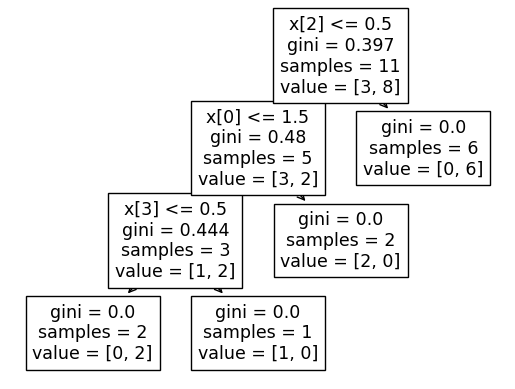

In [16]:
tree.plot_tree(Classifier)

In [32]:
plt.figure(figsize = (15,10))
tree.plot_tree(Classifier,feature_names = data.columns.values,
              filled = True)
plt.title("Tennis Data Decision Tree")
plt.show

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype=object) instead.

<Figure size 1500x1000 with 0 Axes>